In [1]:
from typing import List

import numpy as np
import csv
from pathlib import Path

import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d

In [2]:
alphas = [0.25, 0.5, 0.75, 1.0]
seeds = [12, 42, 69, 10420]

In [3]:
def interpolate(x, y, at):
    return interp1d(x, y, kind="linear", fill_value=(np.min(y), np.max(y)), bounds_error=False)(at)

In [4]:
def plot(all_evals: List, label: str, smooth_factor=2, color="b", max_samples=None, eval_rate=None):
    intervals = np.arange(0, max_samples, eval_rate)
    all_evals = np.stack([interpolate(np.array(evals)[:,0],np.array(evals)[:,1],intervals) for evals in all_evals])
    mean_reward = all_evals.mean(axis=0)
    sem_reward = sem(all_evals, axis=0)
    ci_95 = 1.96 * sem_reward

    mean_reward_smooth = gaussian_filter1d(mean_reward, smooth_factor)
    ci_95_smooth = gaussian_filter1d(ci_95, smooth_factor)

    plt.plot(intervals, mean_reward_smooth, label=label, color=color)
    plt.fill_between(intervals, mean_reward_smooth - ci_95_smooth, mean_reward_smooth + ci_95_smooth, color=color, alpha=0.2)

In [5]:
def load_evals(path):
    with open(path, newline='') as file:
        rd = csv.reader(file)
        return list(map(lambda x: [float(y) for y in x], rd))

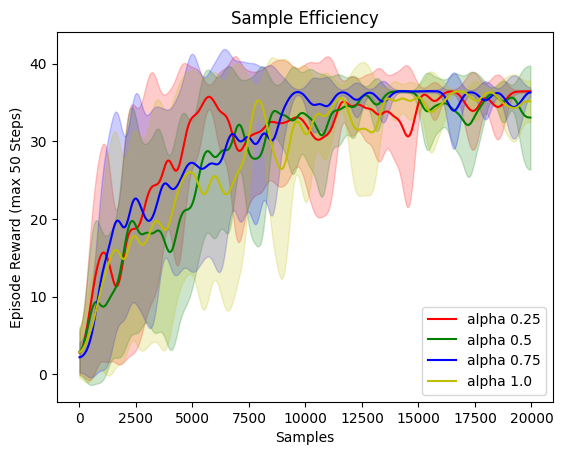

In [9]:
path = Path.cwd()
path = path / "stackelberg_mbrl" / "experiments" / "poster_mal_agent_reward" / "sample_efficiency" / "alpha"
colors = ['r', 'g', 'b', 'm']
paths = [[f"{path}_{alpha}_seed_{seed}" for seed in seeds] for alpha in alphas]
evals = np.array([[load_evals(p) for p in a] for a in paths])
max_samples = np.max(evals[:, :, :, 0])

smooth_factor = 5.0
for e, a, c in zip(evals, alphas, colors):
    plot(e, f"alpha {a}", smooth_factor=smooth_factor, max_samples=max_samples, eval_rate=50, color=c)
    
plt.title("Sample Efficiency")
plt.ylabel("Episode Reward (max 50 Steps)")
plt.xlabel("Samples")
plt.legend()

# This part is just for creating data

In [7]:
from stackelberg_mbrl.experiments.experiment_config import ExperimentConfig, EnvConfig, PolicyConfig, WorldModelConfig, LoadPolicy, LeaderEnvConfig, SampleEfficiency
from stackelberg_mbrl.train_mal import train_contextualized_MAL
from itertools import product

for alpha, seed in product(alphas, seeds):
    config = ExperimentConfig(
        experiment_name="poster_mal_agent_reward",
        env_config=EnvConfig(
            env_true_id="simple_mdp_2",
            env_eval_id="simple_mdp_2",
            max_episode_steps=50
        ),
        policy_config=LoadPolicy(
            path="stackelberg_mbrl/experiments/poster_mal_agent_reward/checkpoints/policy_simple_mdp_2.zip",
        ),
        # policy_config=PolicyConfig(
        #     pretrain_iterations=1,
        #     samples_per_training_iteration=1_000_000,
        #     model_save_name="policy_simple_mdp_2",
        # ),
        leader_env_config=LeaderEnvConfig(
            env_reward_weight=alpha
        ),
        sample_efficiency=SampleEfficiency(
            sample_eval_rate=100,
            n_eval_episodes=30,
            max_samples=20_000,
            log_save_name=f"alpha_{alpha}_seed_{seed}"
        ),
        world_model_config=WorldModelConfig(
            total_training_steps=250_000,
            # total_training_steps=1_000,
            model_save_name="simple_mdp_2",
        ),
        seed=seed
    )

    train_contextualized_MAL(config)

/Users/kacper/micromamba/envs/stackelberg/lib/python3.10/site-packages/pydantic/_internal/_fields.py:160: UserWarning: Field "model_save_name" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/Users/kacper/micromamba/envs/stackelberg/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.num_states to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.num_states` for environment variables or `env.get_wrapper_attr('num_states')` that will search the reminding wrappers.
  logger.warn(
/Users/kacper/micromamba/envs/stackelberg/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.num_actions to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.num_actions` for environment variables or `env.get

Loading policy model from file.


/Users/kacper/micromamba/envs/stackelberg/lib/python3.10/site-packages/stable_baselines3/ppo/ppo.py:155: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 100`, after every 1 untruncated mini-batches, there will be a truncated mini-batch of size 36
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=100 and n_envs=1)
  warnings.warn(
/Users/kacper/micromamba/envs/stackelberg/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.num_states to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.num_states` for environment variables or `env.get_wrapper_attr('num_states')` that will search the reminding wrappers.
  logger.warn(
/Users/kacper/micromamba/envs/stackelberg/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.num_actions to get variables from other wrappers is

Output()

/Users/kacper/micromamba/envs/stackelberg/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:181: 
DeprecationWarning: WARN: Current gymnasium version requires that `Env.reset` can be passed `options` to allow the 
environment initialisation to be passed additional information.
  logger.deprecation(

/Users/kacper/micromamba/envs/stackelberg/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: 
env.max_ep_steps to get variables from other wrappers is deprecated and will be removed in v1.0, to get this 
variable you can do `env.unwrapped.max_ep_steps` for environment variables or 
`env.get_wrapper_attr('max_ep_steps')` that will search the reminding wrappers.
  logger.warn(

/Users/kacper/micromamba/envs/stackelberg/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: 
env.initial_state to get variables from other wrappers is deprecated and will be removed in v1.0, to get this 
variable you can do `env.unwrapped.initial_state` for environment variables or 
`env.get_wrapper_attr('initial_state')` that will search the reminding wrappers.
  logger.warn(

/Users/kacper/micromamba/envs/stackelberg/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: 
env.final_state to get variables from other wrappers is deprecated and will be removed in v1.0, to get this 
variable you can do `env.unwrapped.final_state` for environment variables or `env.get_wrapper_attr('final_state')` 
that will search the reminding wrappers.
  logger.warn(

/Users/kacper/micromamba/envs/stackelberg/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: 
UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting 
modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first
with ``Monitor`` wrapper.
  warnings.warn(

Training world model


saving 200 records into stackelberg_mbrl/experiments/poster_mal_agent_reward/sample_efficiency/alpha_0.25_seed_12.
Model reward: (8.606014470476657, 0.3134404136874823)
Avg Policy Reward on learned model:   4.855 ± 4.705
Avg Policy Reward on real env:   36.530 ± 0.665


/Users/kacper/micromamba/envs/stackelberg/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.draw_mdp to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.draw_mdp` for environment variables or `env.get_wrapper_attr('draw_mdp')` that will search the reminding wrappers.
  logger.warn(


Loading policy model from file.


Output()

Training world model


saving 200 records into stackelberg_mbrl/experiments/poster_mal_agent_reward/sample_efficiency/alpha_0.25_seed_42.
Model reward: (8.72988177165389, 0.1725429214325398)
Avg Policy Reward on learned model:   10.545 ± 5.254
Avg Policy Reward on real env:   35.330 ± 1.998
Loading policy model from file.


Output()

Training world model


saving 200 records into stackelberg_mbrl/experiments/poster_mal_agent_reward/sample_efficiency/alpha_0.25_seed_69.
Model reward: (9.01629915786907, 0.33488616170466545)
Avg Policy Reward on learned model:   17.195 ± 12.443
Avg Policy Reward on real env:   35.650 ± 1.518
Loading policy model from file.


Output()

Training world model


saving 200 records into stackelberg_mbrl/experiments/poster_mal_agent_reward/sample_efficiency/alpha_0.25_seed_10420.
Model reward: (9.129084035009146, 0.165395345124122)
Avg Policy Reward on learned model:   8.875 ± 10.228
Avg Policy Reward on real env:   36.770 ± 0.531
Loading policy model from file.


Output()

Training world model


saving 200 records into stackelberg_mbrl/experiments/poster_mal_agent_reward/sample_efficiency/alpha_0.5_seed_12.
Model reward: (18.46785197369754, 0.16352580562233923)
Avg Policy Reward on learned model:   11.555 ± 4.900
Avg Policy Reward on real env:   36.930 ± 0.531
Loading policy model from file.


Output()

Training world model


saving 200 records into stackelberg_mbrl/experiments/poster_mal_agent_reward/sample_efficiency/alpha_0.5_seed_42.
Model reward: (18.11789007857442, 0.5197557706545192)
Avg Policy Reward on learned model:   25.750 ± 7.753
Avg Policy Reward on real env:   36.530 ± 1.157
Loading policy model from file.


Output()

Training world model


saving 200 records into stackelberg_mbrl/experiments/poster_mal_agent_reward/sample_efficiency/alpha_0.5_seed_69.
Model reward: (18.113451094180345, 0.6102626843243534)
Avg Policy Reward on learned model:   16.295 ± 10.239
Avg Policy Reward on real env:   36.610 ± 0.999
Loading policy model from file.


Output()

Training world model


saving 200 records into stackelberg_mbrl/experiments/poster_mal_agent_reward/sample_efficiency/alpha_0.5_seed_10420.
Model reward: (16.709529178217053, 4.3933708330294)
Avg Policy Reward on learned model:   0.625 ± 0.785
Avg Policy Reward on real env:   37.010 ± 0.367
Loading policy model from file.


Output()

Training world model


saving 200 records into stackelberg_mbrl/experiments/poster_mal_agent_reward/sample_efficiency/alpha_0.75_seed_12.
Model reward: (27.362774576991796, 0.73791055520038)
Avg Policy Reward on learned model:   7.435 ± 7.637
Avg Policy Reward on real env:   36.130 ± 1.395
Loading policy model from file.


Output()

Training world model


saving 200 records into stackelberg_mbrl/experiments/poster_mal_agent_reward/sample_efficiency/alpha_0.75_seed_42.
Model reward: (27.257314962893723, 0.7414957163768285)
Avg Policy Reward on learned model:   22.060 ± 4.974
Avg Policy Reward on real env:   36.370 ± 0.835
Loading policy model from file.


Output()

Training world model


saving 200 records into stackelberg_mbrl/experiments/poster_mal_agent_reward/sample_efficiency/alpha_0.75_seed_69.
Model reward: (27.258323246985675, 0.8328275324278384)
Avg Policy Reward on learned model:   4.670 ± 4.895
Avg Policy Reward on real env:   36.690 ± 0.720
Loading policy model from file.


Output()

Training world model


saving 200 records into stackelberg_mbrl/experiments/poster_mal_agent_reward/sample_efficiency/alpha_0.75_seed_10420.
Model reward: (24.569142334908246, 7.338277238909727)
Avg Policy Reward on learned model:   4.185 ± 3.764
Avg Policy Reward on real env:   35.650 ± 2.147
Loading policy model from file.


Output()

Training world model


saving 200 records into stackelberg_mbrl/experiments/poster_mal_agent_reward/sample_efficiency/alpha_1.0_seed_12.
Model reward: (36.04999999888241, 1.200000001117587)
Avg Policy Reward on learned model:   25.795 ± 12.662
Avg Policy Reward on real env:   36.210 ± 1.341
Loading policy model from file.


Output()

Training world model


saving 200 records into stackelberg_mbrl/experiments/poster_mal_agent_reward/sample_efficiency/alpha_1.0_seed_42.
Model reward: (36.769999999552965, 0.5306599669510795)
Avg Policy Reward on learned model:   13.615 ± 6.262
Avg Policy Reward on real env:   36.450 ± 1.290
Loading policy model from file.


Output()

Training world model


saving 200 records into stackelberg_mbrl/experiments/poster_mal_agent_reward/sample_efficiency/alpha_1.0_seed_69.
Model reward: (36.68999999947846, 1.189285500893089)
Avg Policy Reward on learned model:   10.725 ± 8.865
Avg Policy Reward on real env:   37.090 ± 0.480
Loading policy model from file.


Output()

Training world model


saving 200 records into stackelberg_mbrl/experiments/poster_mal_agent_reward/sample_efficiency/alpha_1.0_seed_10420.
Model reward: (36.769999999552965, 0.8158431229346587)
Avg Policy Reward on learned model:   2.390 ± 1.721
Avg Policy Reward on real env:   36.370 ± 0.977
